### initiate imports

In [1]:
import data_analysis as da
import procedures as pro
from pathlib import Path
from time import sleep

C:\Users\2020e\PycharmProjects\UW-Platteville-Nanolab-Keithley\procedures.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### set data folder

In [2]:
data_folder = Path('C:/Users/2020e/Desktop/cnt/picoamp data/2/4/gated')

# procedures
## Sweep

In [ ]:
experiment = pro.Sweep(
    address='PRIMARY',
    start=-0.5,
    end=0.5,
    measurements=51,
    max_current=0.001,
    samples=50,
    nplc=1,
    soak=2,
    azero=False,
    )
print(f'this experiment will take: {experiment.duration()}')

## Dual Sweep

In [ ]:
experiment = pro.DualSweep(
    primary_address='PRIMARY',
    secondary_address='SECONDARY',
    primary_start=-0.5,
    primary_end=0.5,
    primary_measurements=51,
    secondary_start=-2,
    secondary_end=2,
    secondary_measurements=50,
    primary_max_current=0.001,
    secondary_max_current=0.001,
    samples=10,
    nplc=0.1,
    soak=1,
    azero=False
)

print(f'this experiment will take: {experiment.duration()}')

## Picoammeter Sweep

In [ ]:
experiment = pro.PicoSweep(
    voltmeter_address='PRIMARY',
    ammeter_address='AMMETER',
    start=-0.5,
    end=0.5,
    measurements=51,
    samples=200,
    nplc=2,
    soak=2,
    azero=False
)

print(f'this experiment will take: {experiment.duration()}')

## Picoammeter Dual Sweep

In [ ]:
experiment = pro.PicoDualSweep(
    primary_address='PRIMARY',
    secondary_address='SECONDARY',
    ammeter_address='AMMETER',
    primary_start=-0.5,
    primary_end=0.5,
    primary_measurements=51,
    secondary_start=-5,
    secondary_end=5,
    secondary_measurements=51,
    secondary_max_current=0.1,
    samples=100,
    nplc=1,
    soak=2,
    azero=False
)

print(f'this experiment will take: {experiment.duration()}')

## Execute sweep

In [ ]:
out = experiment.execute()

# Analyze Sweep
### from existing variable

In [ ]:
analysis = da.Analysis(out)

### read previous sweep

In [3]:
analysis = da.Analysis(data_folder / 'output(2).parquet')

### zero data if needed

In [4]:
analysis.zero(inplace=True)

,voltage,secondary voltage,voltage sd,current,current sd,secondary voltage sd,secondary current,secondary current sd
0,-0.5,-5.0,None,9.219635e-11,4.389127e-11,None,-1.633043e-10,2.446024e-10
1,-0.5,-4.8,None,6.192835e-11,4.350752e-11,None,-1.149374e-10,1.086787e-11
2,-0.5,-4.6,None,7.065955e-11,4.511022e-11,None,-1.118190e-10,1.949572e-11
3,-0.5,-4.4,None,6.687605e-11,4.340416e-11,None,-1.122760e-10,1.128309e-11
4,-0.5,-4.2,None,7.124165e-11,4.255312e-11,None,-2.110266e-10,2.252820e-10
...,...,...,...,...,...,...,...,...
2596,0.5,4.2,None,-2.253264e-10,4.170729e-11,None,-8.991833e-11,5.455563e-12
2597,0.5,4.4,None,-2.189235e-10,3.991267e-11,None,-8.927145e-11,7.259038e-12
2598,0.5,4.6,None,-2.107745e-10,3.300379e-11,None,-8.884285e-11,8.027537e-12
2599,0.5,4.8,None,-1.918570e-10,4.136225e-11,None,-8.861093e-11,7.248349e-12


### flip current if needed

In [5]:
analysis.invert_current(inplace=True)

,voltage,secondary voltage,voltage sd,current,current sd,secondary voltage sd,secondary current,secondary current sd
0,-0.5,-5.0,None,-9.219635e-11,4.389127e-11,None,-1.633043e-10,2.446024e-10
1,-0.5,-4.8,None,-6.192835e-11,4.350752e-11,None,-1.149374e-10,1.086787e-11
2,-0.5,-4.6,None,-7.065955e-11,4.511022e-11,None,-1.118190e-10,1.949572e-11
3,-0.5,-4.4,None,-6.687605e-11,4.340416e-11,None,-1.122760e-10,1.128309e-11
4,-0.5,-4.2,None,-7.124165e-11,4.255312e-11,None,-2.110266e-10,2.252820e-10
...,...,...,...,...,...,...,...,...
2596,0.5,4.2,None,2.253264e-10,4.170729e-11,None,-8.991833e-11,5.455563e-12
2597,0.5,4.4,None,2.189235e-10,3.991267e-11,None,-8.927145e-11,7.259038e-12
2598,0.5,4.6,None,2.107745e-10,3.300379e-11,None,-8.884285e-11,8.027537e-12
2599,0.5,4.8,None,1.918570e-10,4.136225e-11,None,-8.861093e-11,7.248349e-12


### show plot

TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'float'

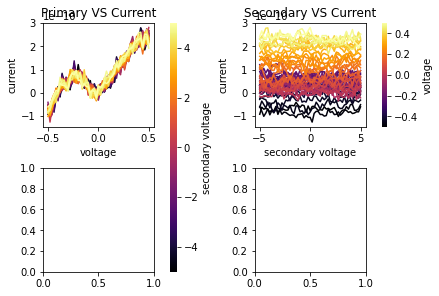

In [6]:

analysis.plot(path=data_folder / 'fig(2 flipped and zeroed).png')

### switching current factor

In [ ]:
print(analysis.switching_current())

### export dataframe
- csv: generally bad unless you will never use program again and don't have Excel
- xlsx: generally bad unless you will never use program again
- pkl: generally good, but bigger than feather. Only readable by python
- parquet: Excellent for archiving, readable by some programs (not Excel)
- fea: Excellent for caching, readable by some programs (not Excel)

use da.to_excel for saving multiple sheets in one Excel doc

In [ ]:
analysis.write(data_folder / 'output(2).parquet')

### save all data for viewing

In [ ]:
if 'secondary voltage' in analysis:
    da.to_excel(data_folder / 'output1.xlsx', by_primary=analysis.set_index(['voltage', 'secondary voltage']), by_secondary=analysis.sort_values(['secondary voltage', 'voltage']).set_index(['secondary voltage', 'voltage']), fn=analysis.fowler_nordheim_transform(), switching=analysis.switching_current())
else:
    da.to_excel(data_folder / 'output1.xlsx', by_voltage=analysis, by_current=analysis.sort_values(['current', 'voltage']), fn=analysis.fowler_nordheim_transform())